<a href="https://colab.research.google.com/github/linahourieh/Breast-Cancer/blob/main/Breast_Cancer_BRCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import Essential Libraries
# Data Manipulation
import pandas as pd
import numpy as np
import datetime
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

# Data Visualization
import seaborn as sns
import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt



# Statistical Tests
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency


In [2]:
# import Data
df = pd.read_csv('https://raw.githubusercontent.com/linahourieh/Breast-Cancer/main/BRCA.csv')
df.head(3)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive


In [3]:
# data shape
df.shape

(341, 16)

# Clean Variables

In [4]:
# sum of null values
df.isna().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [5]:
# investigate missing value
df[df['Patient_ID'].isna() == True]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# getting index of Empty rows
df[df['Patient_ID'].isna() == True].index

Int64Index([334, 335, 336, 337, 338, 339, 340], dtype='int64')

In [7]:
# dropping them
df.drop(index=[334, 335, 336, 337, 338, 339, 340], inplace=True)

In [8]:
# Rechecking the null values
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [9]:
# get the index of those as well
df[df['Patient_Status'].isna() == True].index

Int64Index([7, 22, 99, 111, 182, 196, 206, 219, 221, 285, 286, 305, 321], dtype='int64')

In [10]:
# dropping them
df.drop(index=[7, 22, 99, 111, 182, 196, 206, 219, 221, 285, 286, 305, 321], inplace=True)

In [11]:
'''from sklearn.impute import KNNImputer

df['Patient_Status_map'] = df['Patient_Status'].map({'Alive':1, 'Dead':0})
imputer1 = KNNImputer(n_neighbors=19, weights="uniform").fit(df[['Patient_Status_map']])
df['Patient_Status_2'] = imputer1.transform(df[['Patient_Status_map']])
print(df['Patient_Status_2'].value_counts())'''

'from sklearn.impute import KNNImputer\n\ndf[\'Patient_Status_map\'] = df[\'Patient_Status\'].map({\'Alive\':1, \'Dead\':0})\nimputer1 = KNNImputer(n_neighbors=19, weights="uniform").fit(df[[\'Patient_Status_map\']])\ndf[\'Patient_Status_2\'] = imputer1.transform(df[[\'Patient_Status_map\']])\nprint(df[\'Patient_Status_2\'].value_counts())'

In [12]:
df.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    4
Patient_Status        0
dtype: int64

# Feature Engineering

I tried to fill the missing value in the `Date_of_Last_Visit` using KNN imputer. However, it is not possible to predict its value in this format *09-Nov-18*
object. So I followed these steps:

1- Transformed `df['Date_of_Last_Visit']` and `df['Date_of_Surgery']` into datetime.

2- Create `df['Recovery_Period']` which is a subtraction of previous pd.series.

3- Use KNN to fill missing values in `df['Recovery_Period']`.

4- Reuse the `df['Recovery_Period']` = `df['Date_of_Last_Visit']` - `df['Date_of_Surgery']` to fill in missing values in Date of Last Visit







In [13]:
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])

In [14]:
df['Recovery_Period'] = df['Date_of_Last_Visit'] - df['Date_of_Surgery']

In [15]:
df['Recovery_Period'] = df['Recovery_Period'].dt.days

In [16]:
imputer1 = KNNImputer(n_neighbors=15, weights="uniform").fit(df[['Recovery_Period']])
df['Recovery_Period'] = imputer1.transform(df[['Recovery_Period']])
print(df['Recovery_Period'])

0      155.0
1      562.0
2      274.0
3      168.0
4      782.0
       ...  
329     90.0
330    124.0
331    434.0
332    456.0
333    421.0
Name: Recovery_Period, Length: 321, dtype: float64


In [17]:
df['Recovery_Period'] = pd.to_timedelta(df['Recovery_Period'], unit='D')

In [18]:
df['Date_of_Last_Visit']= df['Recovery_Period'] + df['Date_of_Surgery']

In [19]:
df.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
Recovery_Period       0
dtype: int64

# Visualization

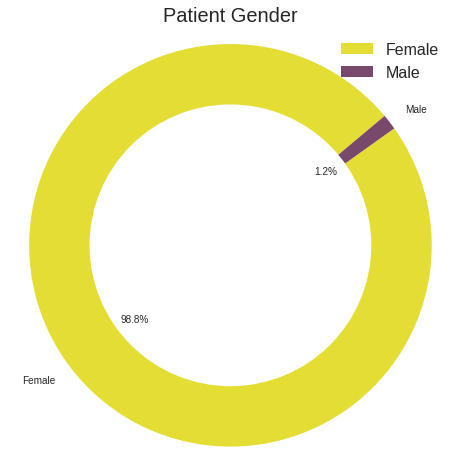

In [37]:
# Pie chart data
labels = ['Female', 'Male']
sizes = df['Gender'].value_counts()

#colors
colors = ['#E3DD34','#78496B','#F0527F','#E0EFF0']
 
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%', startangle=40)

#draw circle inside the pie chart 
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

leg = ax1.legend(prop={"size":16})

plt.title('Patient Gender',fontsize=20)
plt.show()

In [35]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
mpl.style.use('seaborn-whitegrid')

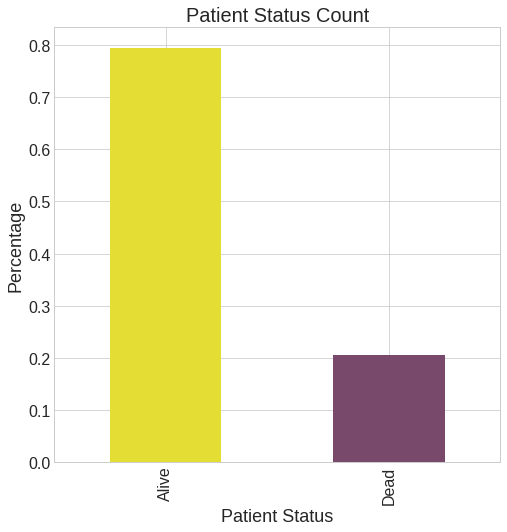

In [42]:
# generate plot pf patient status


df['Patient_Status'].value_counts(normalize=True).plot(kind='bar', figsize=(8, 8), color=colors)



plt.title('Patient Status Count',fontsize=20)
plt.xlabel('Patient Status',fontsize=18)
plt.ylabel('Percentage',fontsize=18)
plt.xticks(fontsize= 16 )
plt.yticks(fontsize= 16 )

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


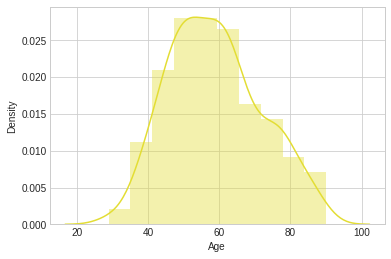

In [43]:
sns.distplot(df['Age'],bins=10,color=colors[0])

In [57]:
contigency= pd.crosstab(df['Patient_Status'],df['Histology'], normalize='index')
contigency

Histology,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
Patient_Status,,,
Alive,0.701961,0.262745,0.035294
Dead,0.712121,0.242424,0.045455


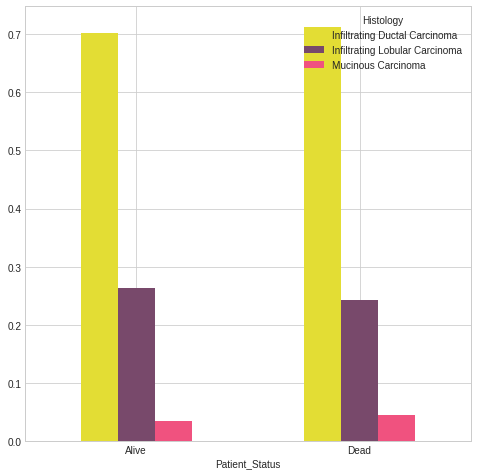

In [58]:
barplot = contigency.plot.bar(rot=0, color=colors, figsize=(8, 8))

In [ ]:
contigency_ts= pd.crosstab(df['Patient_Status'],df['Tumour_Stage'], normalize='index')
contigency_ts

Tumour_Stage,I,II,III
Patient_Status,,,
Alive,0.200000,0.564706,0.235294
Dead,0.151515,0.575758,0.272727


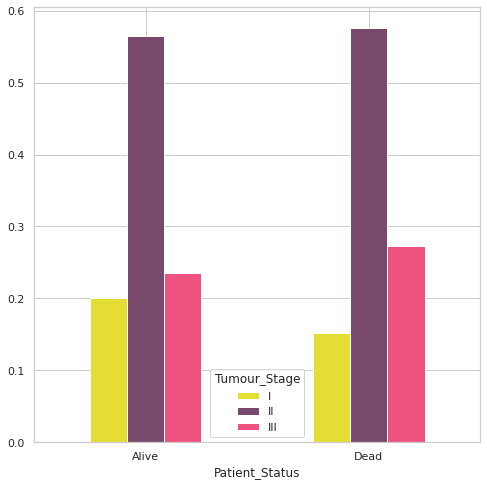

In [ ]:
barplot = contigency_ts.plot.bar(rot=0, color=colors, figsize=(8, 8))

In [49]:
contigency_her = pd.crosstab(df['Patient_Status'],df['HER2 status'],normalize='index')
contigency_her

HER2 status,Negative,Positive
Patient_Status,,
Alive,0.901961,0.098039
Dead,0.939394,0.060606


<Figure size 1080x576 with 0 Axes>

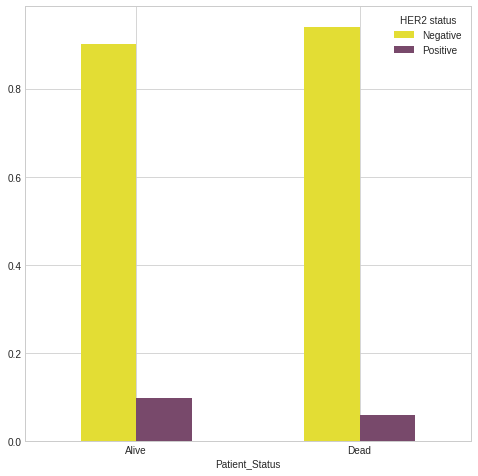

In [51]:
#f, ax = plt.subplots(figsize=(18,5))
barplot = contigency_her.plot.bar(rot=0, color=colors, figsize=(8, 8))
plt.show()

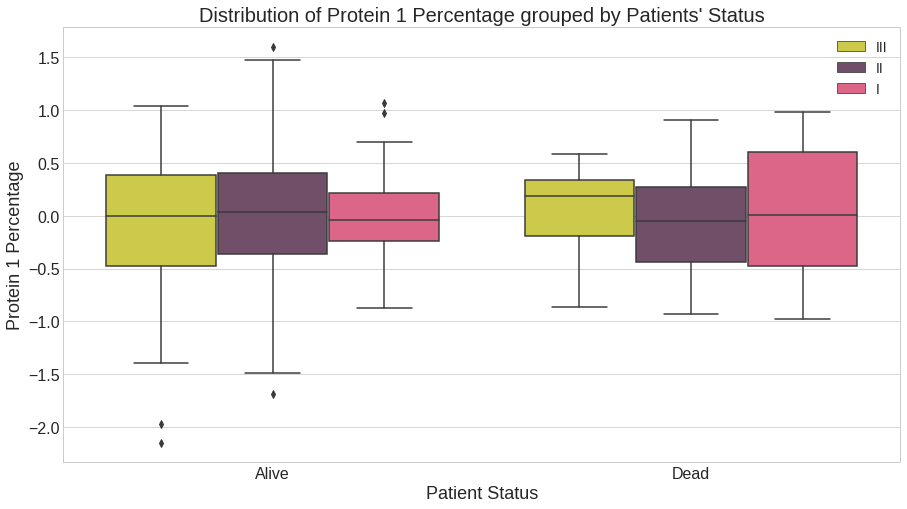

In [59]:
plt.figure(figsize=(15,8))
ax1 = sns.boxplot(x="Patient_Status", y="Protein1", hue='Tumour_Stage', data=df, palette=colors)
plt.title("Distribution of Protein 1 Percentage grouped by Patients' Status",fontsize=20)
plt.xlabel('Patient Status',fontsize=18)
plt.ylabel('Protein 1 Percentage',fontsize=18)
plt.xticks(fontsize= 16 )
plt.yticks(fontsize= 16 )
ax1.legend(fontsize = 14)
plt.show()

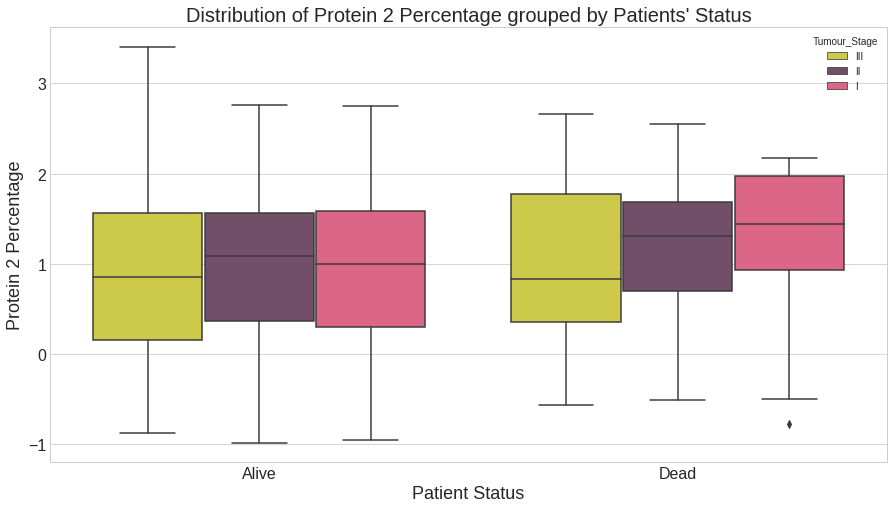

In [56]:
plt.figure(figsize=(15,8))
ax1 = sns.boxplot(x="Patient_Status", y="Protein2", hue='Tumour_Stage', data=df, palette=colors)
plt.title("Distribution of Protein 2 Percentage grouped by Patients' Status",fontsize=20)
plt.xlabel('Patient Status',fontsize=18)
plt.ylabel('Protein 2 Percentage',fontsize=18)
plt.xticks(fontsize= 16 )
plt.yticks(fontsize= 16 )
plt.show()

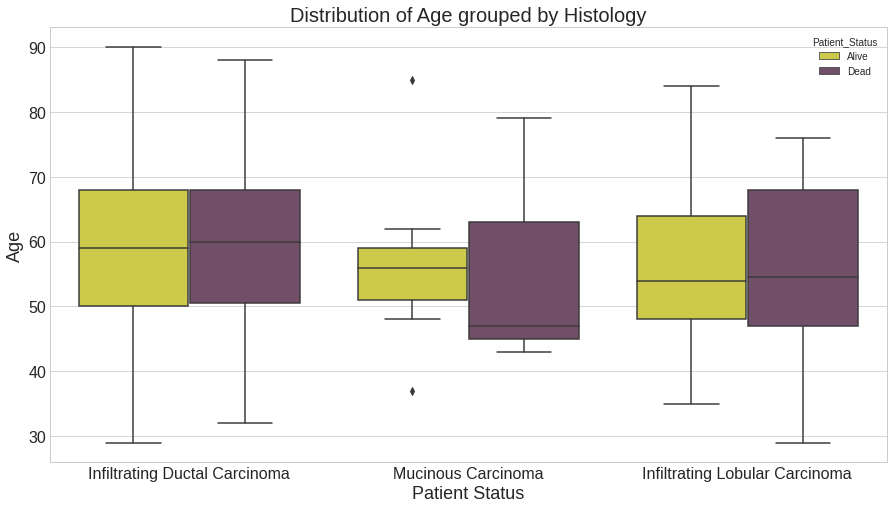

In [55]:
plt.figure(figsize=(15,8))
ax1 = sns.boxplot(x="Histology", y="Age", hue='Patient_Status',
                 data=df, palette=colors)
plt.title("Distribution of Age grouped by Histology",fontsize=20)
plt.xlabel('Patient Status',fontsize=18)
plt.ylabel('Age',fontsize=18)
plt.xticks(fontsize= 16 )
plt.yticks(fontsize= 16 )
plt.show()

In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status', 'Recovery_Period'],
      dtype='object')

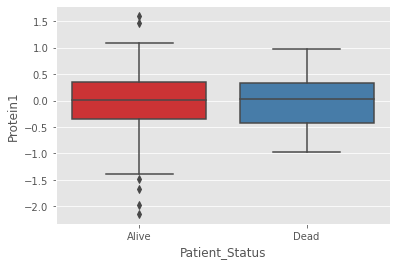

In [ ]:
sns.boxplot(x="Patient_Status", y="Protein1",
                 data=df, palette="Set1")

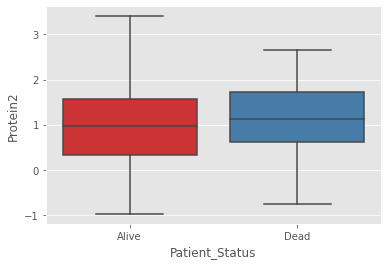

In [ ]:
sns.boxplot(x="Patient_Status", y="Protein2",
                 data=df, palette="Set1")

In [ ]:
df.columns

Index(['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage',
       'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type',
       'Patient_Status'],
      dtype='object')

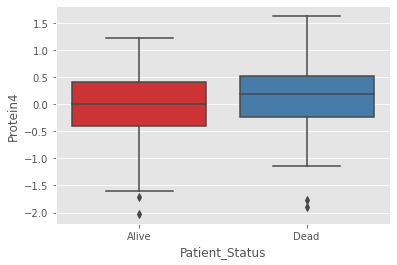

In [ ]:
sns.boxplot(x="Patient_Status", y="Protein4",
                 data=df, palette="Set1")

In [ ]:
df.drop(columns=['Patient_ID','Gender', 'Date_of_Surgery', 'Date_of_Last_Visit','Recovery_Period'], inplace=True)

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

# Hypothesis Testing

## Hypothesis 1


**H₀ (Null Hypothesis)** — the `surgery_type` and `Patient_Status` are independent of each other.


**H₁ (Alternate Hypothesis)** — the `surgery_type` and `Patient_Status` are dependent on each other.


And you draw your conclusions based on the following p-value conditions:


p < 0.05 — this means the two categorical variables are correlated.


p > 0.05 — this means the two categorical variables are not correlated

In [60]:
contigency_pct= pd.crosstab(df['Patient_Status'],df['Surgery_type'])
contigency_pct

Surgery_type,Lumpectomy,Modified Radical Mastectomy,Other,Simple Mastectomy
Patient_Status,,,,
Alive,57,72,73,53
Dead,9,20,25,12


In [61]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_pct)
print(f'Chi2_score: {c}')
print(f"The p-value is: {p}")
print(f"The degree-of-freedom is: {dof}")

#print(f"The p-value is: {p}")

Chi2_score: 3.660869742407592
The p-value is: 0.30048934106855263
The degree-of-freedom is: 3


The p-value is 0.3 > 0.05 which means that we do not reject the null hypothesis at 95% level of confidence. The `surgery_type` and `Patient_Status` are independent of each other.

## Hypothesis 2

**H₀ (Null Hypothesis)** — the `Tumour_Stage` and `Patient_Status` are independent of each other.


**H₁ (Alternate Hypothesis)** — the `Tumour_Stage` and `Patient_Status` are dependent on each other.


And you draw your conclusions based on the following p-value conditions:


p < 0.05 — this means the two categorical variables are correlated.


p > 0.05 — this means the two categorical variables are not correlated

In [62]:
contigency_pct= pd.crosstab(df['Patient_Status'],df['Tumour_Stage'])
contigency_pct

Tumour_Stage,I,II,III
Patient_Status,,,
Alive,51,144,60
Dead,10,38,18


In [64]:
c, p, dof, expected = chi2_contingency(contigency_pct)
print(f'Chi2_score: {c}')
print(f"The p-value is: {p}")
print(f"The degree-of-freedom is: {dof}")

Chi2_score: 0.9622235045571601
The p-value is: 0.618095840224689
The degree-of-freedom is: 2


The p-value is 0.61 > 0.05 which means that we do not reject the null hypothesis at 95% level of confidence. The `Tumour_Stage` and `Patient_Status` are independent of each other.

## Hypothesis 3

In [65]:
contigency_pct= pd.crosstab(df['Patient_Status'],df['Histology'])
contigency_pct
c, p, dof, expected = chi2_contingency(contigency_pct)
print(f'Chi2_score: {c}')
print(f"The p-value is: {p}")
print(f"The degree-of-freedom is: {dof}")

Chi2_score: 0.23620557189716754
The p-value is: 0.8886047118422011
The degree-of-freedom is: 2


The p-value is 0.88 > 0.05 which means that we do not reject the null hypothesis at 95% level of confidence. The `Histology` and `Patient_Status` are independent of each other.

## Hypothesis 4


In [ ]:
f1 = df['Patient_Status'] == "Alive"
f2 = df['Patient_Status'] == "Dead"

In [ ]:
np.var(df[f1]['Protein1'])

0.31181800293488404

In [ ]:
np.var(df[f2]['Protein1'])

0.2439185279477255

The ratio of the larger sample variance to the smaller sample variance is 12.26 / 7.73 = 1.586, which is less than 4. This means we can assume that the population variances are equal.

In [66]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=df[f1]['Protein1'], b=df[f2]['Protein1'], equal_var=True)

NameError: ignored

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)


Because the p-value of our test (0.53005) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.